In [38]:
import os, sys
import tqdm
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

from src.visualization import plot_action
from src.preprocess_data import preprocess_data
from src.labels import preprocess_label

In [39]:
import ast 
all_events = pd.read_csv('../metrica-data/EPV-data/all-match.csv')
all_events['freeze_frame'] = all_events['freeze_frame'].apply(ast.literal_eval)
all_events['Intended_Receiver'] = all_events['Intended_Receiver'].apply(ast.literal_eval)
all_events.head()

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,ownGoal,teamId,eventName,subEventName,accurate,freeze_frame,value_label,Intended_Receiver,game_id,pass_id
0,Away,SET PIECE,KICK OFF,1,1,0.1,0,0.0,B19,NaN,...,0,2,Set piece,Kick off,0,{},0,{},1,0
1,Away,PASS,PASS,1,1,0.1,2,0.2,B19,B21,...,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",0,"{'dist': {'ID': 'B21', 'end_x': 59.66244, 'end...",1,1
2,Away,PASS,PASS,1,2,0.2,7,0.7,B21,B15,...,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",0,"{'dist': {'ID': 'B15', 'end_x': 63.013248, 'en...",1,2
3,Away,PASS,PASS,1,18,1.8,25,2.5,B15,B19,...,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",0,"{'dist': {'ID': 'B19', 'end_x': 48.329568, 'en...",1,3
4,Away,PASS,PASS,1,31,3.1,39,3.9,B19,B21,...,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",0,"{'dist': {'ID': 'B21', 'end_x': 52.68942, 'end...",1,4


In [41]:
col = ['team', 'type', 'subtype', 'session', 'start_frame','end_frame','from', 'to','eventName',
       'subEventName', 'accurate', 'value_label','freeze_frame','Intended_Receiver','game_id']

pass_events = all_events[(all_events['eventName'] == 'Pass') & (all_events['accurate']==1) & (all_events['start_frame']<all_events['end_frame'])]
pass_events[col].head()

,team,type,subtype,session,start_frame,end_frame,from,to,eventName,subEventName,accurate,value_label,freeze_frame,Intended_Receiver,game_id
1,Away,PASS,PASS,1,1,2,B19,B21,Pass,Pass,1,0,"{'B25': {'teammate': True, 'actor': False, 'ba...","{'dist': {'ID': 'B21', 'end_x': 59.66244, 'end...",1
2,Away,PASS,PASS,1,2,7,B21,B15,Pass,Pass,1,0,"{'B25': {'teammate': True, 'actor': False, 'ba...","{'dist': {'ID': 'B15', 'end_x': 63.013248, 'en...",1
3,Away,PASS,PASS,1,18,25,B15,B19,Pass,Pass,1,0,"{'B25': {'teammate': True, 'actor': False, 'ba...","{'dist': {'ID': 'B19', 'end_x': 48.329568, 'en...",1
4,Away,PASS,PASS,1,31,39,B19,B21,Pass,Pass,1,0,"{'B25': {'teammate': True, 'actor': False, 'ba...","{'dist': {'ID': 'B21', 'end_x': 52.68942, 'end...",1
5,Away,PASS,PASS,1,77,87,B21,B22,Pass,Pass,1,0,"{'B25': {'teammate': True, 'actor': False, 'ba...","{'dist': {'ID': 'B22', 'end_x': 33.18483600000...",1


In [45]:
pd.DataFrame.from_dict(pass_events.loc[1,"freeze_frame"],orient='index')

,teammate,actor,ball,start_x,start_y,start_vx,start_vy,end_x,end_y,end_vx,end_vy
B25,True,False,False,97.731495,34.17273,-1.339970,-0.019173,97.608456,34.173576,-1.191155,-0.280863
B15,True,False,False,63.064440,14.97168,-2.051766,0.765264,63.013248,15.045912,-1.891850,0.234629
B16,True,False,False,73.070640,33.63120,-1.938117,-1.679287,73.043748,33.658920,-1.823416,-1.642523
B17,True,False,False,72.694800,55.06272,-2.074982,-1.893343,72.662940,55.100736,-2.084835,-1.968142
B18,True,False,False,44.045640,44.29800,-1.353995,-3.043234,44.025228,44.280576,-1.397685,-3.069120
B19,True,True,False,49.109760,27.87048,-1.115580,-3.675937,49.087080,27.905328,-1.148448,-3.674203
B20,True,False,False,60.436800,48.79800,1.122890,-4.169862,60.453216,48.801744,1.204881,-4.125253
B21,True,False,False,59.662440,31.15368,-2.221401,-2.005754,59.646132,31.175424,-2.315908,-1.922216
B22,True,False,False,54.072360,67.91184,-0.302513,0.702790,54.041904,67.955904,-0.470218,0.189637
B23,True,False,False,47.188440,3.60144,-2.037537,-1.966954,47.130660,3.606408,-2.031448,-2.055068


In [25]:
pd.DataFrame.from_dict(pass_events.loc[1,"Intended_Receiver"],orient='index')

,ID,end_x,end_y
dist,B21,59.66244,31.15368
dist and angle,B21,59.66244,31.15368
dist and narrow angle,B21,59.66244,31.15368


In [42]:
# 정확도를 계산하는 함수
def calculate_accuracy(events, method):
    correct_predictions = events.apply(lambda row: row['Intended_Receiver'][method]['ID'] == row['to'], axis=1)
    accuracy = correct_predictions.mean()
    return accuracy

# 각 방식에 대한 정확도 계산
methods = ['dist', 'dist and angle', 'dist and narrow angle']
accuracies = {method: calculate_accuracy(pass_events, method) for method in methods}

accuracies

{'dist': 0.9663428174878557,
 'dist and angle': 0.9056210964607911,
 'dist and narrow angle': 0.8188757807078417}

In [24]:
pass_events.loc[1,'Intended_Receiver']

{'dist': {'ID': 'B21', 'end_x': 59.66244, 'end_y': 31.15368},
 'dist and angle': {'ID': 'B21', 'end_x': 59.66244, 'end_y': 31.15368},
 'dist and narrow angle': {'ID': 'B21', 'end_x': 59.66244, 'end_y': 31.15368}}

### Intended-receiver 평가 지표

In [16]:
# 각 방식에 대한 정확도 계산
methods = ['dist', 'dist and angle', 'dist and narrow angle']

# 정확도를 계산하는 함수
def calculate_accuracy(events, method):
    correct_predictions = events.apply(lambda row: row['Intended_Receiver'][method]['ID'] == row['to'], axis=1)
    accuracy = correct_predictions.mean()
    return accuracy

### Metrica1

In [49]:
mingu_df1 = pd.read_csv('../match_1_err.csv',index_col=0)
mingu_df1.head()

,team,start_frame,end_frame,eventName,subEventName,from,to,freeze_frame,accurate,pass_id,xPosStart,yPosStart,episodeStart,ballInPlayStart,xPosEnd,yPosEnd,episodeEnd,ballInPlayEnd,intended_receiver
22,Home,906,916,Pass,Cross,A10,A09,"{'A11': {'teammate': True, 'actor': False, 'ba...",1,33,96.281460,10.170000,2,1,99.138924,33.176304,2,1,8
42,Home,2305,2324,Pass,Pass,A08,A10,"{'A11': {'teammate': True, 'actor': False, 'ba...",1,78,42.539688,20.885328,5,1,64.694160,6.403392,5,1,8
44,Away,2746,2755,Pass,Pass,B21,B20,"{'B25': {'teammate': True, 'actor': False, 'ba...",1,86,58.183488,21.729888,6,1,58.614732,26.668656,6,1,22
49,Away,2882,2907,Pass,Pass,B18,B21,"{'B25': {'teammate': True, 'actor': False, 'ba...",1,96,14.712732,1.278432,6,1,21.312180,7.783560,6,1,20
59,Away,3686,3702,Pass,Pass,B23,B18,"{'B25': {'teammate': True, 'actor': False, 'ba...",1,129,6.466537,0.205429,7,1,23.110596,3.936024,7,1,15


In [61]:
pass_events[pass_events['pass_id'] == 78]

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,ownGoal,teamId,eventName,subEventName,accurate,freeze_frame,value_label,Intended_Receiver,game_id,pass_id
78,Home,PASS,PASS,1,2305,230.5,2324,232.4,A08,A10,...,0,1,Pass,Pass,1,"{'A11': {'teammate': True, 'actor': False, 'ba...",0,"{'dist': {'ID': 'A10', 'end_x': 53.51076000000...",1,78


In [62]:
pd.DataFrame.from_dict(pass_events.loc[78,"Intended_Receiver"],orient='index')

,ID,end_x,end_y
dist,A10,53.51076,9.130536
dist and angle,A10,53.51076,9.130536
dist and narrow angle,A10,53.51076,9.130536


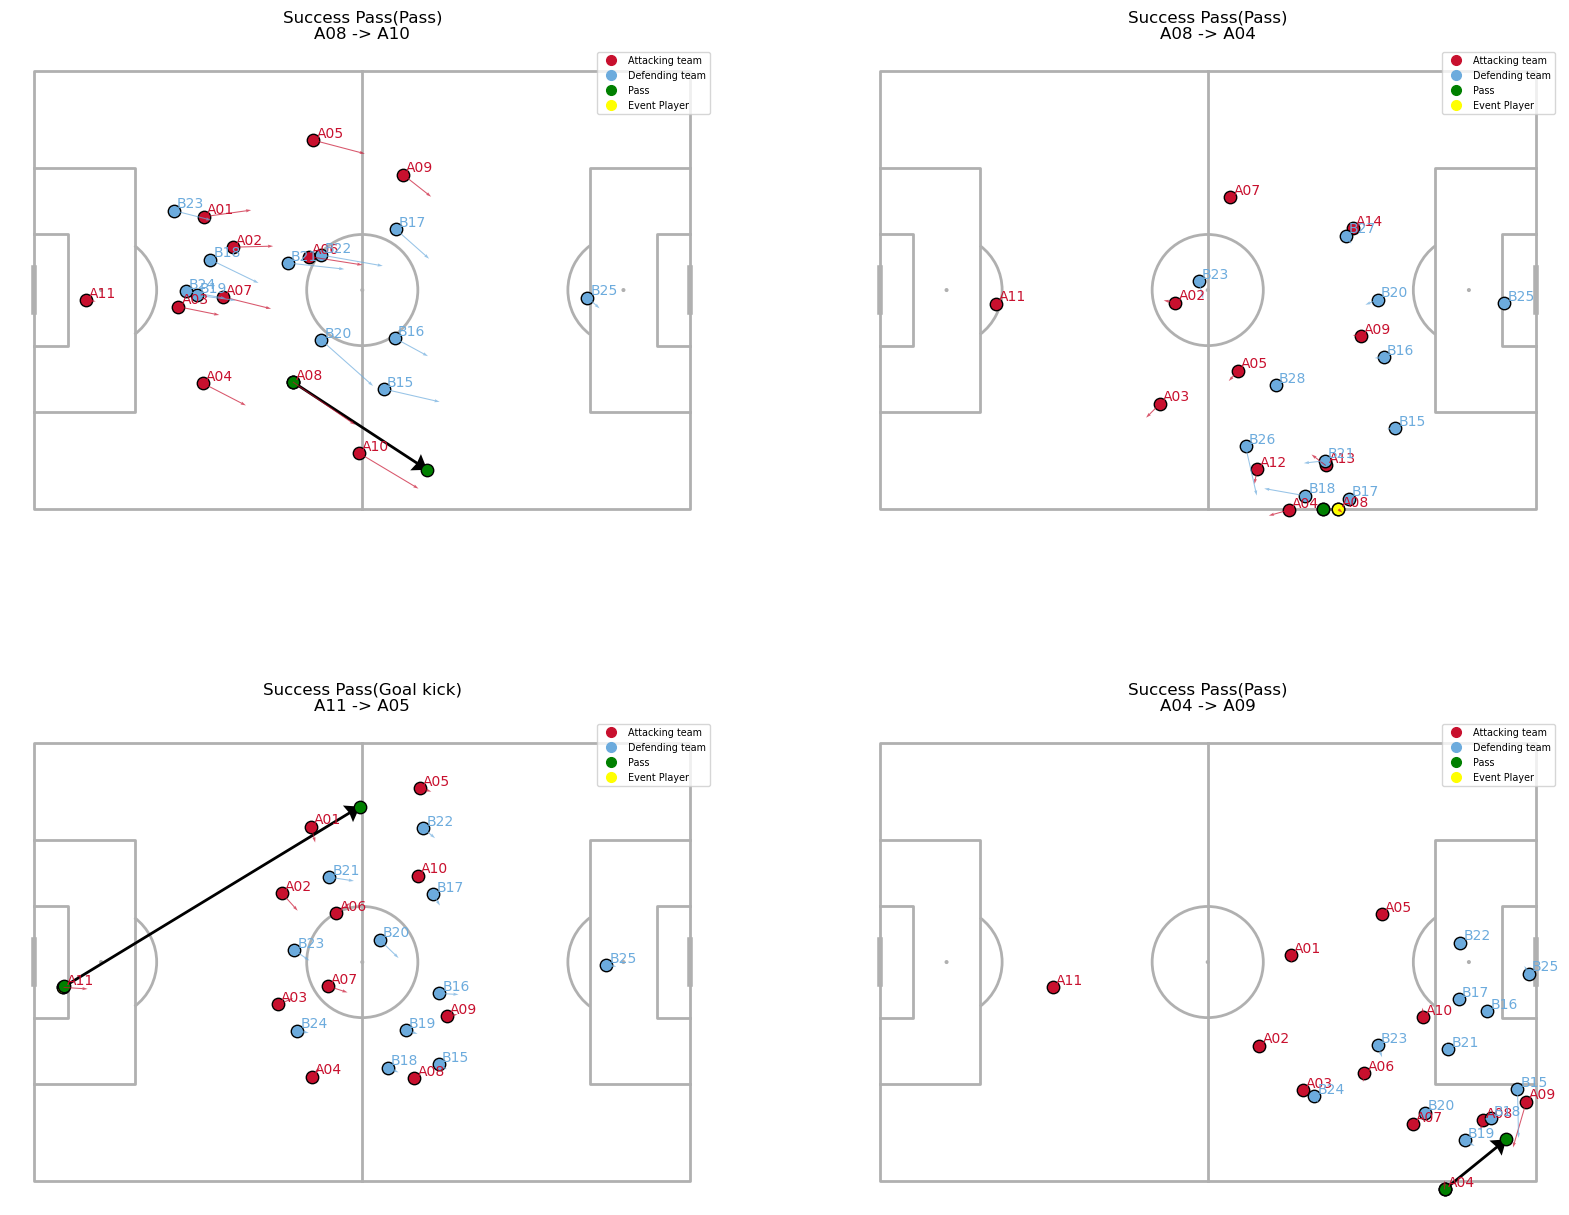

In [63]:
action_id = [78, 1505, 168, 184]

fig, ax = plt.subplots(2,2,figsize=(20,16))

ax_id = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]] 

for i in range(len(action_id)):
    record = all_events.loc[action_id[i]]
    plot_action(record, ax=ax_id[i],field_dimen=(108,72))

plt.show()

In [51]:
pass_events1[pass_events1['pass_id'] == 3][col]

,team,type,subtype,session,start_frame,end_frame,from,to,eventName,subEventName,accurate,value_label,freeze_frame,Intended_Receiver,game_id
3,Away,PASS,PASS,1,18,25,B15,B19,Pass,Pass,1,0,"{'B25': {'teammate': True, 'actor': False, 'ba...","{'dist': {'ID': 'B19', 'end_x': 48.329568, 'en...",1


In [44]:
pass_events1 = pass_events[pass_events['game_id'] == 1]

accuracies = {method: calculate_accuracy(pass_events1, method) for method in methods}
accuracies

{'dist': 0.9661229611041405,
 'dist and angle': 0.8946047678795483,
 'dist and narrow angle': 0.8143036386449184}

In [35]:
pass_events1 = pass_events[pass_events['game_id'] == 1]

accuracies = {method: calculate_accuracy(pass_events1, method) for method in methods}
accuracies

{'dist': 0.9661229611041405,
 'dist and angle': 0.8946047678795483,
 'dist and narrow angle': 0.8143036386449184}

### Metrica2

In [36]:
pass_events2 = pass_events[pass_events['game_id'] == 2]

accuracies = {method: calculate_accuracy(pass_events2, method) for method in methods}
accuracies

{'dist': 0.9761410788381742,
 'dist and angle': 0.9190871369294605,
 'dist and narrow angle': 0.8360995850622407}

In [19]:
pass_events2 = pass_events[pass_events['game_id'] == 2]

accuracies = {method: calculate_accuracy(pass_events2, method) for method in methods}
accuracies

{'dist': 0.9761410788381742,
 'dist and angle': 0.9190871369294605,
 'dist and narrow angle': 0.8360995850622407}

### Metrica3

In [20]:
pass_events3 = pass_events[pass_events['game_id'] == 3]

accuracies = {method: calculate_accuracy(pass_events3, method) for method in methods}
accuracies

{'dist': 0.9580731489741302,
 'dist and angle': 0.9018733273862622,
 'dist and narrow angle': 0.8073148974130241}

### All Metrica

In [17]:
accuracies = {method: calculate_accuracy(pass_events, method) for method in methods}
accuracies

{'dist': 0.9663661581137309,
 'dist and angle': 0.9056865464632455,
 'dist and narrow angle': 0.8183079056865464}

In [33]:
#공의 목적지 - 팀원의 끝 위치
total = len(pass_events)

print(sum(pass_events['to'] == pass_events['intended_receiver_dist'])/total)
print(sum(pass_events['to'] == pass_events['intended_receiver_dist_and_angle'])/total)
print(sum(pass_events['to'] == pass_events['intended_receiver_dist_and_angle_condition'])/total)

0.9986130374479889
0.9972260748959778
0.9965325936199723


In [22]:
#공의 목적지 - 팀원의 시작 위치
total = len(pass_events)

print(sum(pass_events['to'] == pass_events['intended_receiver_dist'])/total)
print(sum(pass_events['to'] == pass_events['intended_receiver_dist_and_angle'])/total)
print(sum(pass_events['to'] == pass_events['intended_receiver_dist_and_angle_condition'])/total)

0.9663661581137309
0.9056865464632455
0.8183079056865464


In [14]:
pass_events.columns

Index(['team', 'type', 'subtype', 'session', 'start_frame', 'start_time',
       'end_frame', 'end_time', 'from', 'to', 'start_x', 'start_y', 'end_x',
       'end_y', 'phase', 'goal', 'ownGoal', 'teamId', 'eventName',
       'subEventName', 'accurate', 'freeze_frame', 'value_label',
       'Intended_Receiver', 'game_id', 'pass_id'],
      dtype='object')

In [22]:
col = ['team', 'type', 'subtype', 'session', 'start_time','end_time','start_frame','end_frame','from', 'to','eventName',
       'subEventName', 'accurate', 'value_label','freeze_frame','Intended_Receiver','game_id','pass_id']
pass_events[(pass_events['start_frame'] == pass_events['end_frame']) & (pass_events['accurate']==1)][col]

,team,type,subtype,session,start_time,end_time,start_frame,end_frame,from,to,eventName,subEventName,accurate,value_label,freeze_frame,Intended_Receiver,game_id,pass_id
751,Home,PASS,PASS,1,2397.0,2397.0,23970,23970,A10,A12,Pass,Pass,1,0,"{'A11': {'teammate': True, 'actor': False, 'ba...","{'dist': {'ID': 'A12', 'end_x': 50.651352, 'en...",1,751
1505,Home,PASS,PASS,2,4936.4,4936.4,49364,49364,A08,A04,Pass,Pass,1,0,"{'A02': {'teammate': True, 'actor': False, 'ba...","{'dist': {'ID': 'A04', 'end_x': 67.314348, 'en...",1,1505


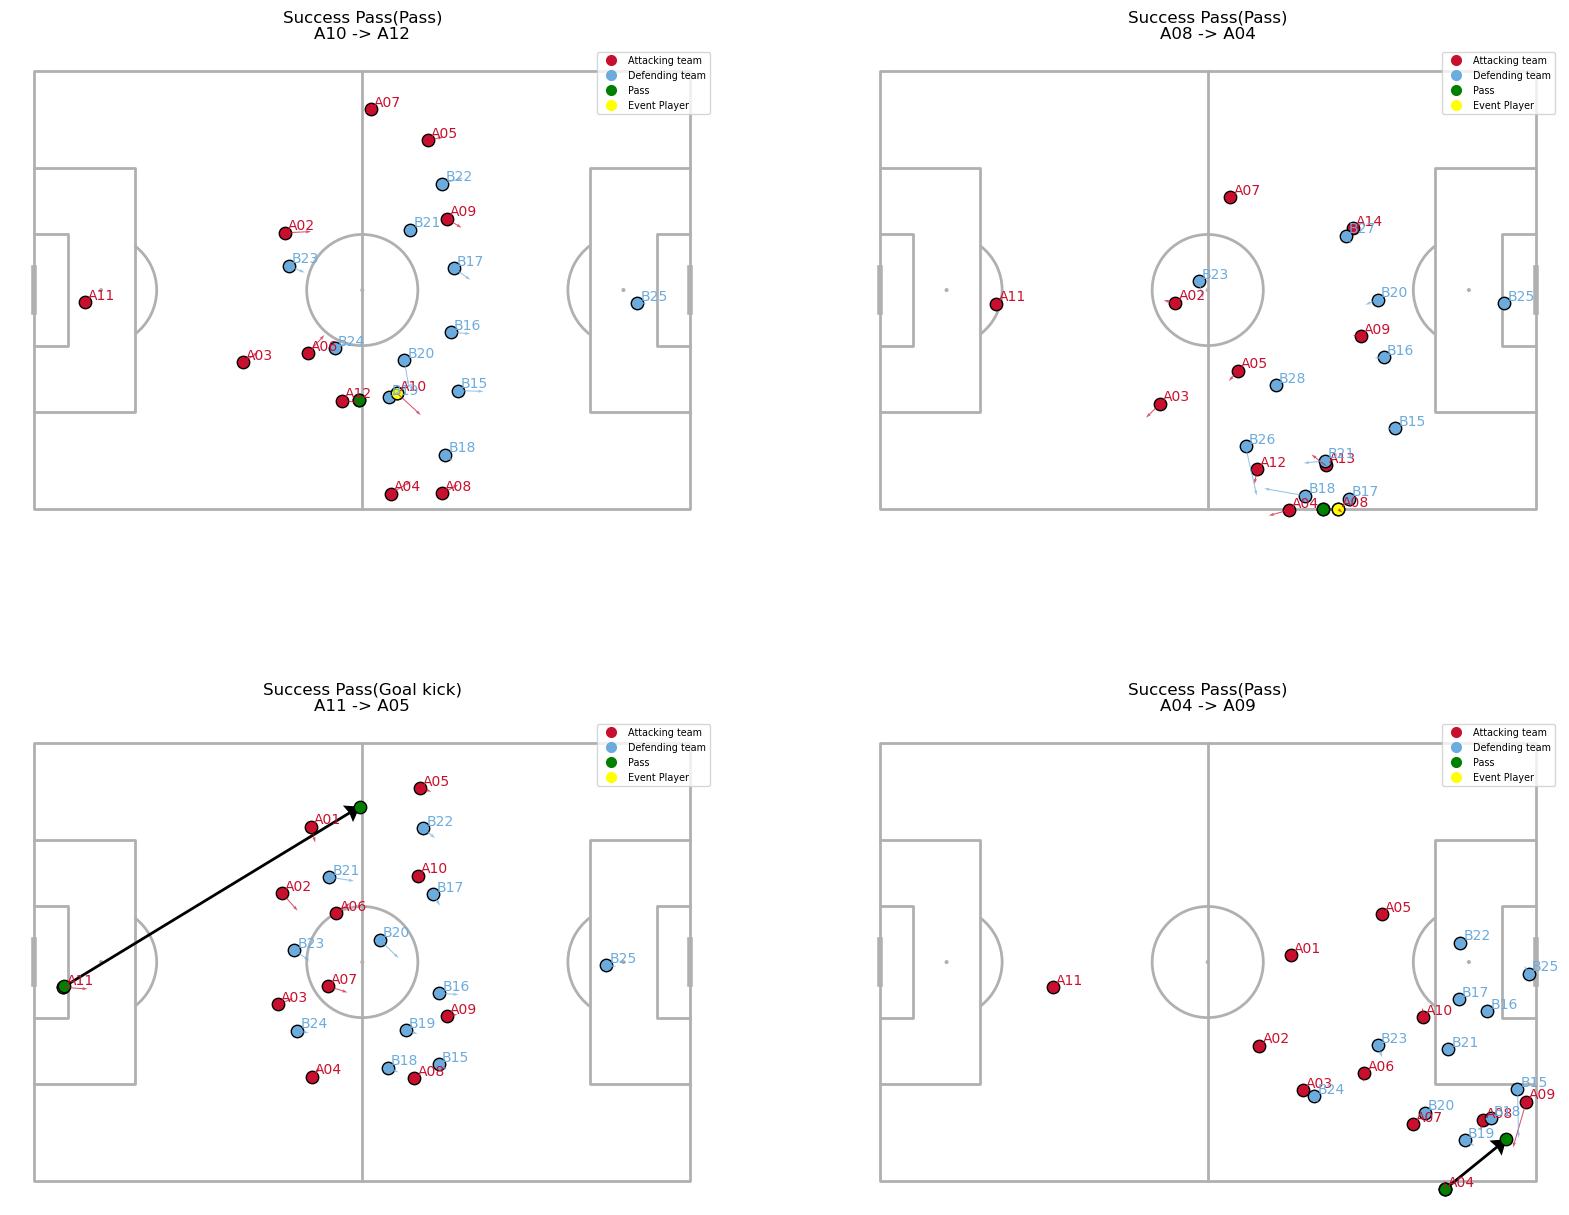

In [11]:
action_id = [751, 1505, 168, 184]

fig, ax = plt.subplots(2,2,figsize=(20,16))

ax_id = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]] 

for i in range(len(action_id)):
    record = all_events.loc[action_id[i]]
    plot_action(record, ax=ax_id[i],field_dimen=(108,72))

plt.show()

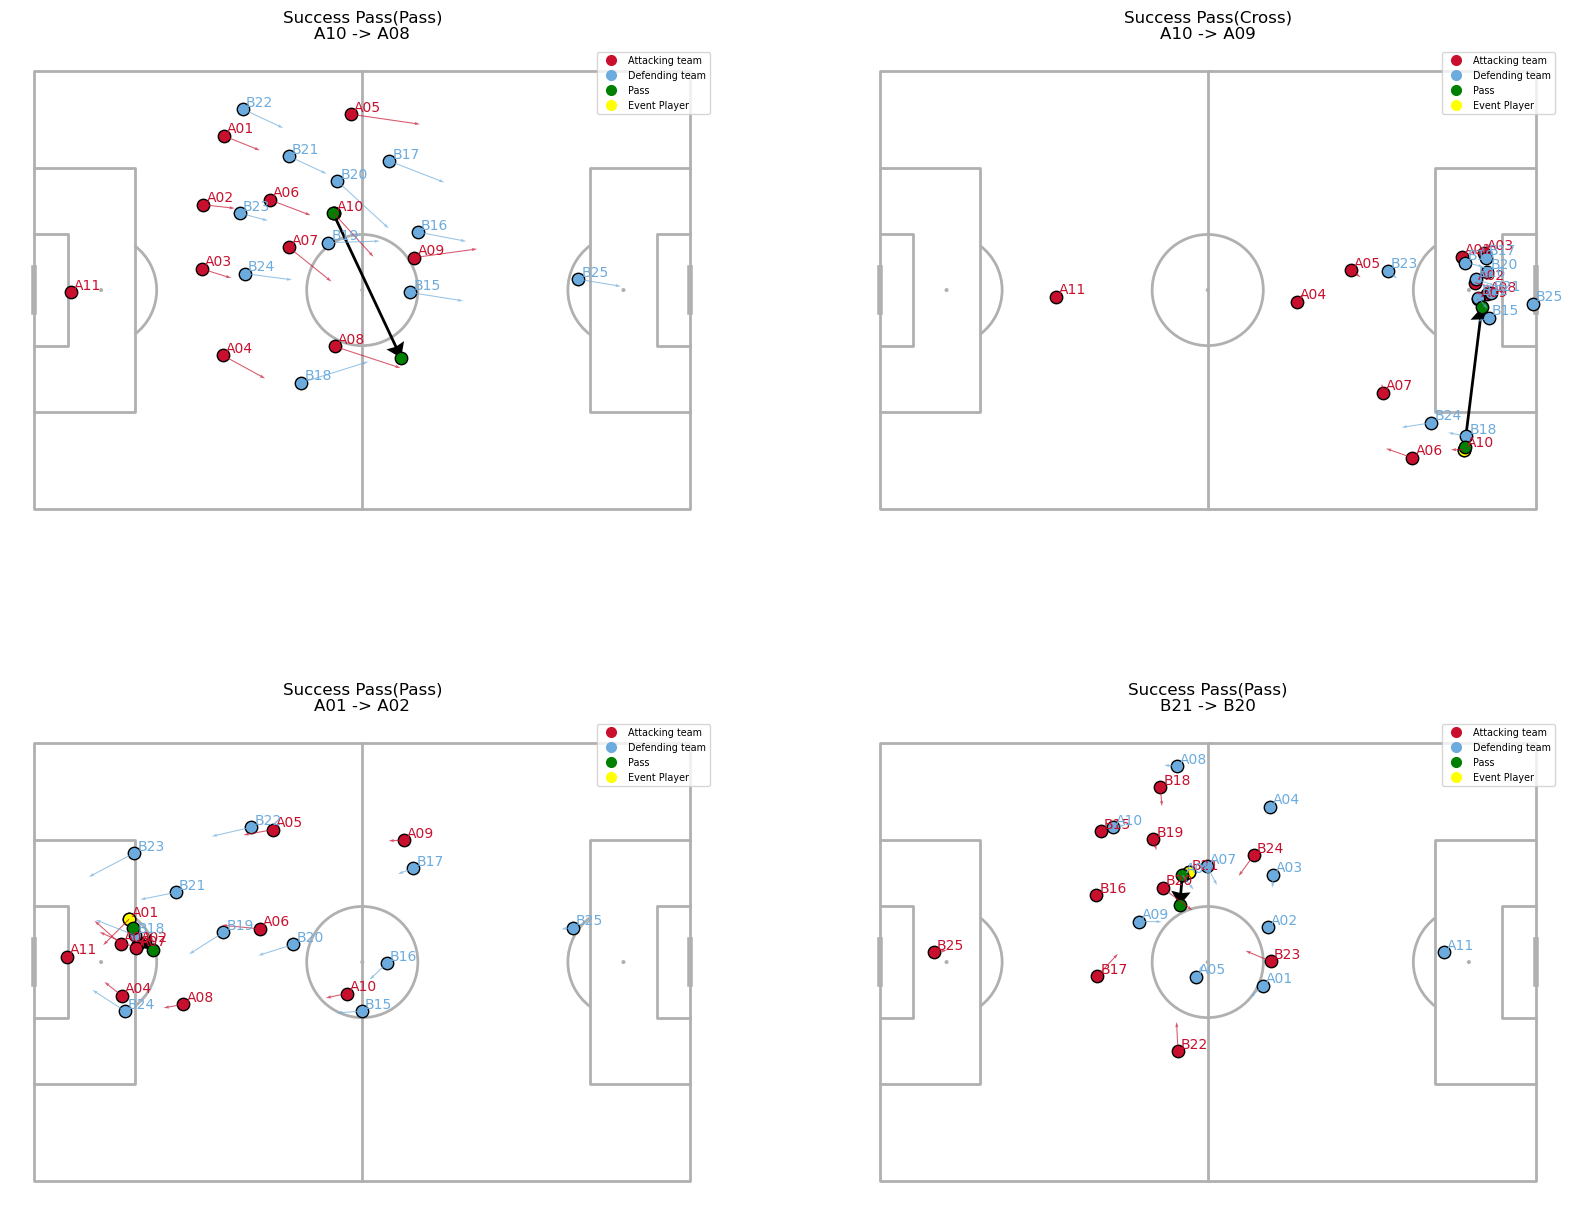

In [37]:
action_id = [27, 33, 74, 86]

fig, ax = plt.subplots(2,2,figsize=(20,16))

ax_id = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]] 

for i in range(len(action_id)):
    record = all_events.loc[action_id[i]]
    plot_action(record, ax=ax_id[i],field_dimen=(108,72))

plt.show()